<a href="https://colab.research.google.com/github/mohanvamsitrade/MLCrashcourse/blob/main/kaggle_connect_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/content'

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression

In [4]:
!pip install q kaggle

In [5]:
from google.colab import files
from google.colab import autoviz
import seaborn as sns

In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohanvamsitrade","key":"b2c28d687e6ddc674d94150da98851da"}'}

In [8]:
!mkdir ~/.kaggle


In [9]:
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression

  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 1.07MB/s]


In [12]:
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!unzip /content/salary-dataset-simple-linear-regression.zip

Archive:  /content/salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [14]:
sal_dataset = pd.read_csv("/content/Salary_dataset.csv")

In [15]:
sal_dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [18]:
sal_dataset.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [22]:
salary_df = pd.DataFrame(sal_dataset)

In [25]:
salary_df = salary_df.rename(columns={"Unnamed: 0":"ID", "YearsExperience":"Exp","Salary":"Salary"})

In [26]:
salary_df.head(10)

,ID,Exp,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [39]:
salary_df['Salary']


0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [40]:
%matplotlib inline

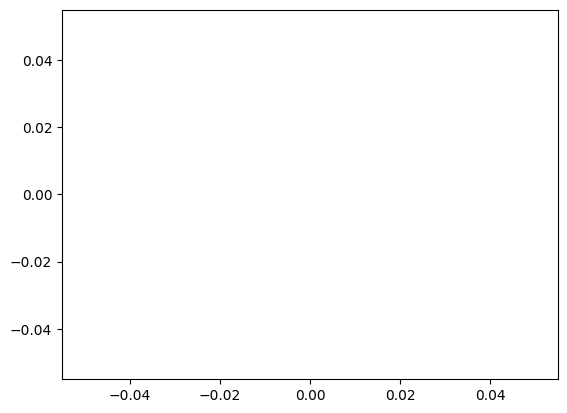

In [42]:
plt.plot();

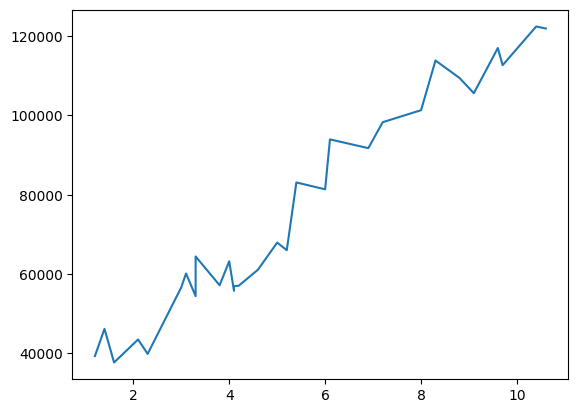

In [43]:
x = salary_df['Exp']
y = salary_df['Salary']
plt.plot(x,y);

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.2 ,  2.14,  3.08,  4.02,  4.96,  5.9 ,  6.84,  7.78,  8.72,
         9.66, 10.6 ]),
 <BarContainer object of 10 artists>)

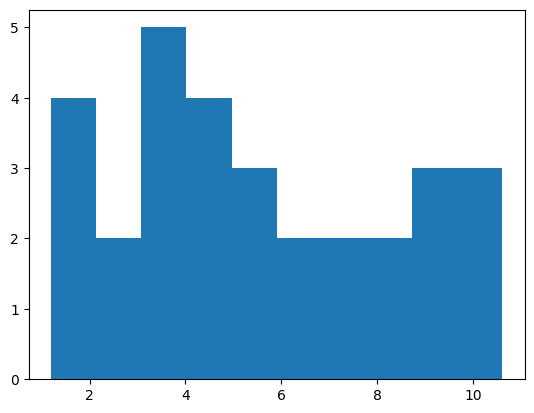

In [46]:
plt.hist(x)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaling = MinMaxScaler()


In [51]:
scaled_data = scaling.fit_transform(salary_df[['Exp','Salary']])

In [55]:
scaled_data_df = pd.DataFrame(scaled_data, columns = ('exp','salary'))

In [56]:
scaled_data_df.head()

,exp,salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


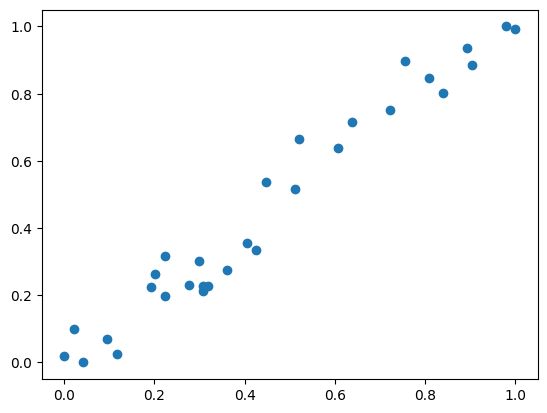

In [58]:
plt.scatter(x,y);

In [70]:
salary_df.head()

,ID,Exp,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [82]:
X = salary_df.iloc[:, 0:2]
y = salary_df.iloc[:,-1]

Model Creation and Selection

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train , X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 2)


In [86]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [116]:
lr.predict(X_test.iloc[0].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37172.82333345])

In [121]:
X_test[:]

,ID,Exp
1,1,1.4
0,0,1.2
14,14,4.6
9,9,3.8
21,21,7.2
19,19,6.1
23,23,8.3
6,6,3.1
3,3,2.1


In [122]:
Y_test[:]

1      46206.0
0      39344.0
14     61112.0
9      57190.0
21     98274.0
19     93941.0
23    113813.0
6      60151.0
3      43526.0
Name: Salary, dtype: float64

In [130]:
lr.predict(X_test.iloc[5].values.reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79653.01818124])

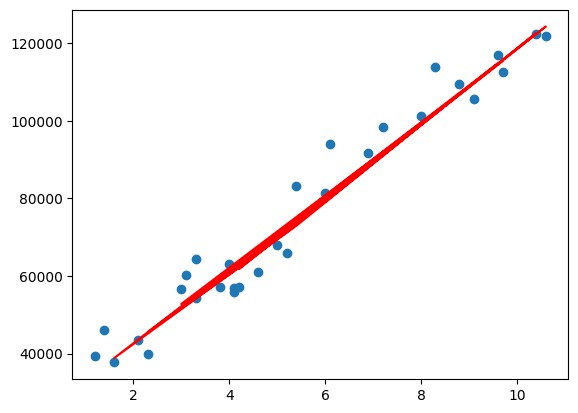

In [137]:
plt.scatter(X["Exp"],y)
plt.plot(X_train["Exp"], lr.predict(X_train), color = 'red')

In [139]:
# Slope of the Model
lr.coef_

array([ -546.91272821, 11132.89871397])

In [140]:
# Intercept of the Model
lr.intercept_

22133.677862106633